In [1]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

In [ ]:
# 전체 코인 리스트를 받아서 url에 추가해 주는 방식으로 파싱하자.

In [2]:
url = 'https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20171220&end=20181220'
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'html.parser')


In [8]:
priceDiv = soup.find('div', attrs={'class':'table-responsive'})
rows = priceDiv.find_all('tr')

In [26]:
data = []
i = 0;

for row in rows:
    tmp = []
    tds = row.findChildren()

    for td in tds:
        tmp.append(td.text)

    if(i > 0):
        tmp[0] = tmp[0].replace(',','')
        tmp[5] = tmp[5].replace(',','')
        tmp[6] = tmp[6].replace(',','')
        data.append({'date':datetime.strptime(tmp[0], '%b %d %Y'),
                     'open':float(tmp[1]),
                     'high':float(tmp[2]),
                     'low':float(tmp[3]),
                     'close':float(tmp[4]),
                     'volume':float(tmp[5]),
                     'mcap':float(tmp[6])})

    i = i + 1;

In [27]:
df = pd.DataFrame(data)

In [28]:
df

,close,date,high,low,mcap,open,volume
0,3745.95,2018-12-19,3949.32,3687.23,6.529913e+10,3706.82,6.810689e+09
1,3696.06,2018-12-18,3701.35,3487.17,6.442259e+10,3544.76,5.911325e+09
2,3545.86,2018-12-17,3597.92,3253.12,6.179893e+10,3253.12,5.409248e+09
3,3252.84,2018-12-16,3305.75,3233.82,5.668544e+10,3236.27,3.744249e+09
4,3236.76,2018-12-15,3275.38,3191.30,5.640069e+10,3244.00,3.551764e+09
5,3242.48,2018-12-14,3329.56,3206.54,5.649438e+10,3311.75,4.372764e+09
6,3313.68,2018-12-13,3489.74,3298.13,5.772869e+10,3487.88,4.343372e+09
7,3486.95,2018-12-12,3534.23,3413.48,6.074163e+10,3421.46,4.139365e+09
8,3424.59,2018-12-11,3513.18,3392.25,5.965020e+10,3497.55,4.696765e+09
9,3502.66,2018-12-10,3647.33,3470.14,6.100445e+10,3612.05,5.020969e+09


In [30]:
df = df.iloc[::-1]
df.head()

,close,date,high,low,mcap,open,volume
363,15802.9,2017-12-21,17567.7,15342.7,2.647887e+11,16642.4,1.651660e+10
362,13831.8,2017-12-22,15943.4,11833.0,2.317883e+11,15898.0,2.219800e+10
361,14699.2,2017-12-23,15603.2,13828.8,2.463492e+11,13948.7,1.308600e+10
360,13925.8,2017-12-24,14626.0,12747.7,2.334142e+11,14608.2,1.157230e+10
359,14026.6,2017-12-25,14593.0,13448.9,2.351268e+11,13995.9,1.066470e+10


In [31]:
data_frame = pd.DataFrame(df)
data_frame.to_csv('bitcoin.csv',encoding='utf-8')

In [34]:
%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (32,8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

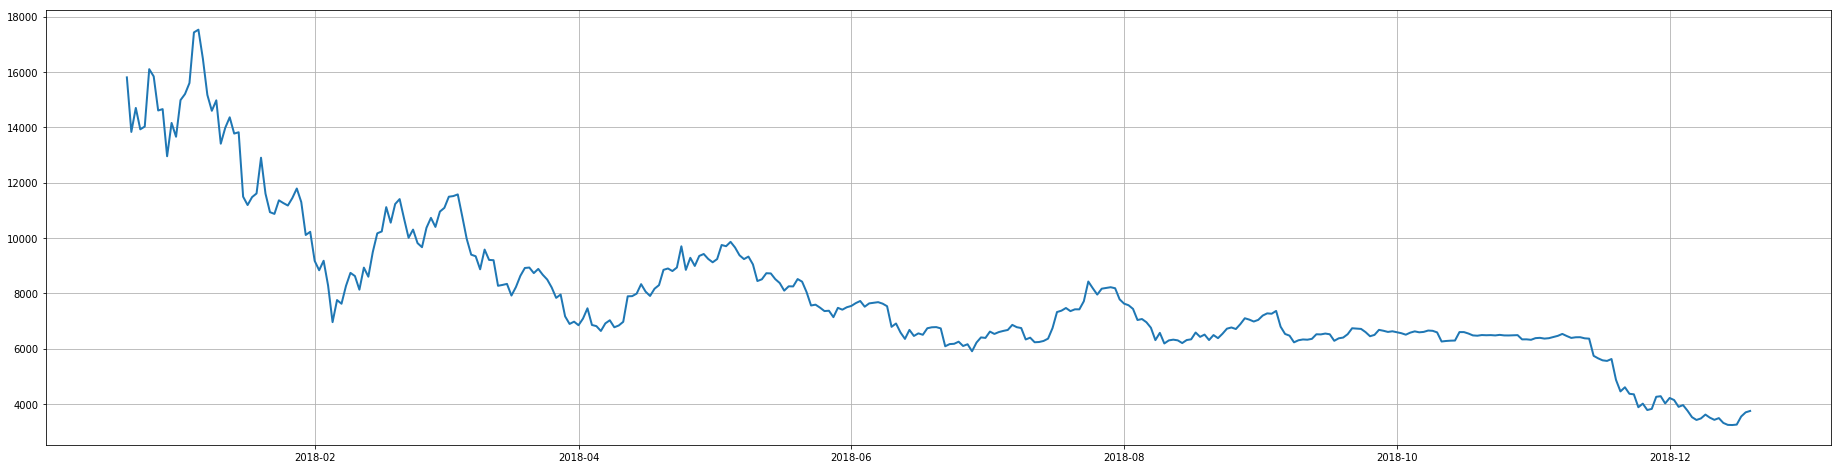

In [35]:
x = df["date"]
y = df["close"]
plt.plot(x, y)
plt.show()